# Epidemiology I: Deterministic SIR Model Code

<ins>The Deterministic SIR Model</ins>

The deterministic SIR model is given by the following system of ordinary differential equations:

$$
\frac{{\rm d} S}{{\rm d} t}  = - \beta S I, \quad 
\frac{{\rm d} I}{{\rm d} t}  = \beta S I - \mu I, \quad 
\frac{{\rm d} R}{{\rm d} t}  = \mu I.
$$

In these equations, $S$ is the number of susceptible individuals, $I$ is the number of infectious individuals, $R$ is the number of removed individuals (recovered and immune, or dead). $N$ is the total number of individuals, where $N = S+I+R$. By adding the three equations, it can be verified that $\frac{d N}{d t} = 0$, and so $N$ is constant. The variables $\beta$ and $\mu$ are model parameters: $\beta$ is the infection rate parameter, $\mu$ is the removal rate parameter (the reciprocal of the expected time for which an infected individual remains infectious).

As shown in the Epidemiology lecture, the basic reproduction number is given by
$ R_0 = \frac{\beta N}{\mu}. $

The Python code cells below compute numerical solutions to this model by calling the SciPy ODE solver odeint. 

Results are shown for specific parameter values: $ N=10^5$, $\beta = 3 \times 10^{-6}$ and $\mu = 0.1$, corresponding to $R_0 = 3$. The initial conditions are $S(0) = N - 5$, $I(0) = 5$, and $R(0) = 0$. So, we start with only 5 infectious individuals.

In [2]:
# import libraries

import numpy as np # Import NumPy library. The "np" bit tells Python to give NumPy the alias of np. So now we can call np. function_name rather than numpy.
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [7]:
# --- First define the RHS of ODE system --- #

def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y

    beta = 3*(10**-6)
    mu = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

In [4]:
# --- Problem setup --- #

# set up time grid for the solution
tf = 100
Nsteps = 1000
t = np.linspace(0, tf, Nsteps+1)

# Set initial conditions and put into array y0
S0 = 10**5 - 5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])

In [5]:
# --- Call the ODE solver and extract solutions --- #
  
y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

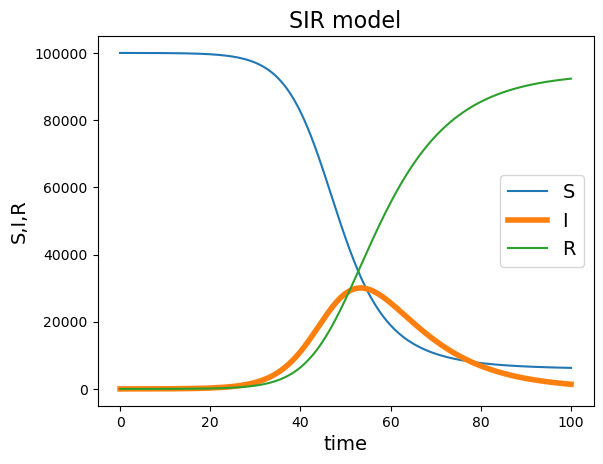

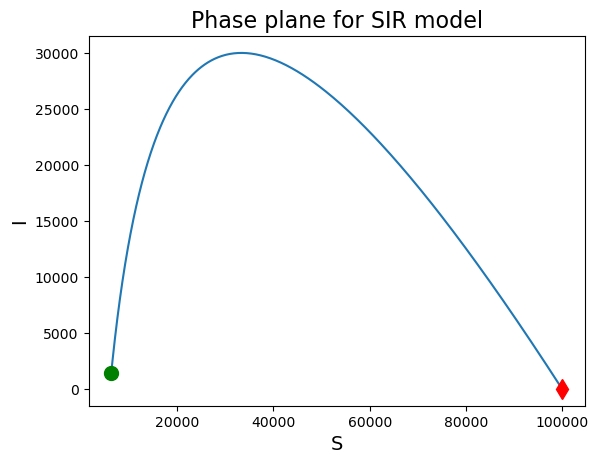

At the end of the simulation, the final values of S, I, and R are (rounded):
S(t=tf) = 6264
I(t=tf) = 1391
R(t=tf) = 92345


In [6]:
# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R
plt.plot(t, S, label = "S")
plt.plot(t, I, lw = 4, label = "I")
plt.plot(t, R, label = "R")

# labels etc
plt.xlabel("time", fontsize = 14)
plt.ylabel("S,I,R", fontsize = 14)
plt.title("SIR model", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()        

# plot the evolution in the S,I phase plane
plt.plot(S, I)

# labels etc
plt.xlabel("S", fontsize = 14)
plt.ylabel("I", fontsize = 14)
plt.title("Phase plane for SIR model", fontsize = 16)

# put some markers to show initial and final states
plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)
plt.show()

# --- Report the final values of S, I, R.  --- #

print("At the end of the simulation, the final values of S, I, and R are (rounded):")
print("S(t=tf) =", round(S[-1]))
print("I(t=tf) =", round(I[-1]))
print("R(t=tf) =", round(R[-1]))

## A1 altered code

In [12]:
# import libraries

import numpy as np # Import NumPy library. The "np" bit tells Python to give NumPy the alias of np. So now we can call np. function_name rather than numpy.
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [52]:
# --- First define the RHS of ODE system --- #

def SIR(y, t, beta=2*(10**(-5)), mu=0.1):
    # returns RHS of the SIR model
    S, I, R = y
    
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

In [53]:
# --- Problem setup --- #

# set up time grid for the solution
tf = 150
Nsteps = 10000
t = np.linspace(0, tf, Nsteps+1)

# Set initial conditions and put into array y0
N = 10**4
I0 = 3
S0 = N - I0
R0 = 0
y0 = np.array([S0, I0, R0])

In [54]:
# --- Call the ODE solver and extract solutions --- #
  
y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

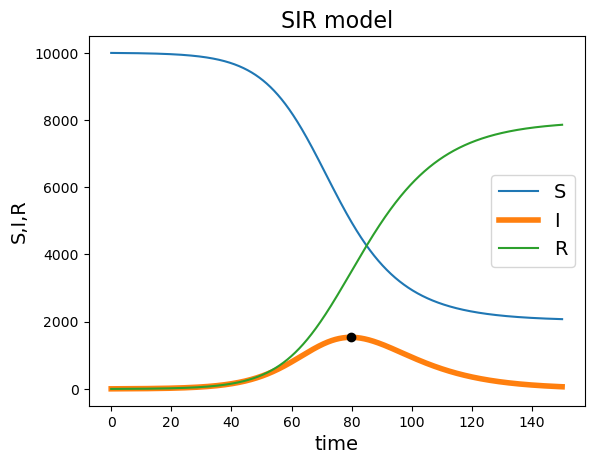

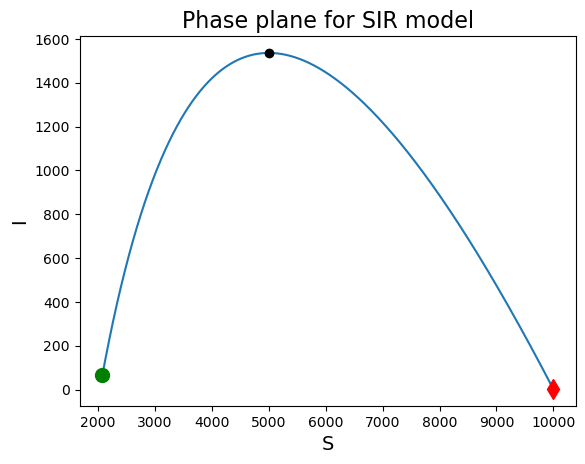

The maximum I was found to be: 1535.7642581040725


In [55]:
# --- Plot various interesting things --- #
# get maximum I and the other corresponding values
max_I_index = I.argmax(axis=0)
max_I = I[max_I_index]
max_I_time = t[max_I_index]
max_I_S = S[max_I_index]

# plot the time evolution of the S, I, R
plt.plot(t, S, label = "S")
plt.plot(t, I, lw = 4, label = "I")
plt.plot(t, R, label = "R")
plt.plot(max_I_time,max_I,"ko")

# labels etc
plt.xlabel("time", fontsize = 14)
plt.ylabel("S,I,R", fontsize = 14)
plt.title("SIR model", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()        

# plot the evolution in the S,I phase plane
plt.plot(S, I)
plt.plot(max_I_S,max_I,"ko")

# labels etc
plt.xlabel("S", fontsize = 14)
plt.ylabel("I", fontsize = 14)
plt.title("Phase plane for SIR model", fontsize = 16)

# put some markers to show initial and final states
plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)
plt.show()

print(f"The maximum I was found to be: {max_I}")

In [90]:
def get_max_I(beta,mu=0.1):
    tf = 150
    Nsteps = 10000
    t = np.linspace(0, tf, Nsteps+1)
    N = 10**4
    I0 = 3
    S0 = N - I0
    R0 = 0
    y0 = np.array([S0, I0, R0])

    out = (odeint(SIR,y0,t,args=(beta,mu)))
    return max(out[:,1]) # The values of I are stored in out[:,1]


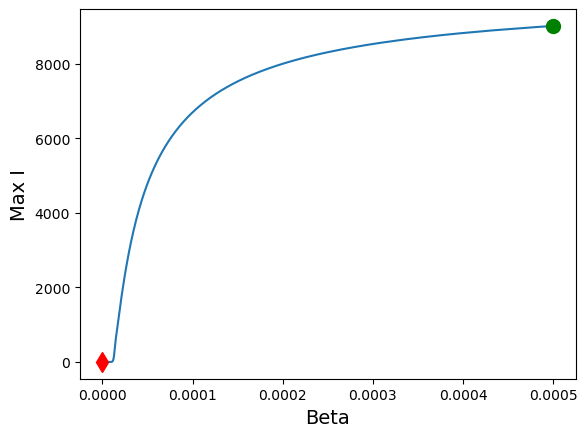

In [100]:
Nsteps = 1000
betas = np.linspace(0,0.0005,Nsteps+1)
max_I_vals = np.zeros(Nsteps+1)
for i in range(0,len(betas)):
    max_I_vals[i] = get_max_I(betas[i])

# plot
plt.plot(betas, max_I_vals)

# labels etc
plt.xlabel("Beta", fontsize = 14)
plt.ylabel("Max I", fontsize = 14)
plt.title("", fontsize = 16)

# put some markers to show initial and final states
plt.plot(betas[0], max_I_vals[0], 'rd', markersize = 10)
plt.plot(betas[-1], max_I_vals[-1], 'go', markersize = 10)
plt.show()

## A2 code

In [81]:
# import libraries

import numpy as np # Import NumPy library. The "np" bit tells Python to give NumPy the alias of np. So now we can call np. function_name rather than numpy.
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
from scipy.optimize import fsolve

In [45]:
# --- First define the RHS of ODE system --- #

def SIR(y, t, beta=2*(10**(-5)), mu=0.1):
    # returns RHS of the SIR model
    S, I, R = y
    
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

In [67]:
def sum_of_vaccinated_and_infected(V0,I0=5,t=500):
    # Set initial conditions and put into array y0
    N = 10**4 - V0
    S0 = N - I0 -V0
    R0 = 0
    y0 = np.array([S0, I0, R0])
    y_sol = odeint(SIR, y0, [0,t])
    final_infected = y_sol[1:,1][0]
    final_removed = y_sol[1:,2][0]
    return (final_infected + final_removed)

In [85]:
def final_size_one_side(x,N=10**4,beta=2*(10**(-5)), mu=0.1):
    return (N-N*np.exp(-(beta*x)/(mu)) - x) # we want to find where this function is zero

Text(0, 0.5, 'I + R')

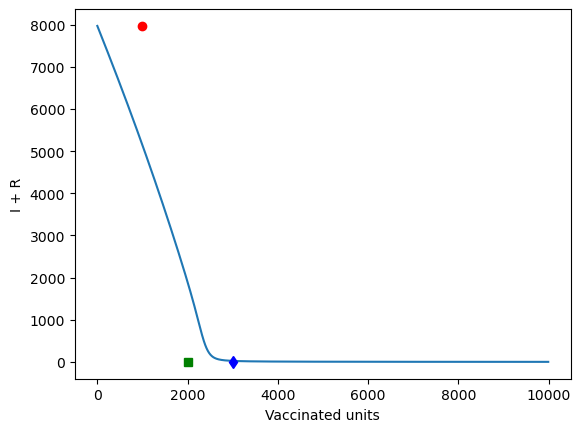

In [89]:
N = 10**4
skip = 10
V_values = np.arange(0,N-5 + 1,skip) # the skip here means that we skip by 10s which makes the
                                        # the calculation faster
plot_values = np.zeros(len(V_values))
for i in range(0,len(V_values)):
    plot_values[i] = sum_of_vaccinated_and_infected(V_values[i])

plt.plot(V_values,plot_values)
plt.plot(1000,fsolve(final_size_one_side,plot_values[int(1000/skip)]),"ro")
plt.plot(2000,fsolve(final_size_one_side,plot_values[int(2000/skip)]),"gs")
plt.plot(3000,fsolve(final_size_one_side,plot_values[int(3000/skip)]),"bd")
plt.xlabel("Vaccinated units")
plt.ylabel("I + R")

#### Derivation of the final size equation

We take $\frac{dI}{dS} = -1 + \frac{\mu}{\beta S}$ and seperate the variables, $$\int 1 dI = \int -1 + \frac{\mu}{\beta S} dS \
\implies I = -S + \frac{\mu}{\beta}\log(S) + C$$
With our boundary conditions we know $C = I(0) + S(0) - \frac{\mu}{\beta}\log(S(0))$ so $$ I = -S + \frac{\mu}{\beta}\log(S) + I(0) + S(0) $$
Now at the beggining, $N = S(0) + I(0) + R(0)$ and $R(0) = 0 \implies S(0) + I(0) = N$

As $t \to \infty$, we know $I(t) \to 0 \text{ and } S(t) + R(t) \to N$ so if we apply this to our equation, as $t \to \infty$ we get:
$$ 0 = -(N-R(\infty)) + \frac{\mu}{\beta}\log(N-R(\infty)) + N - \frac{\mu}{\beta}\log(S(0))\\
\implies R(\infty) = N - S(0)\exp(\frac{-\beta R(\infty)}{\mu})
$$
And as $S(0) \approx N$, this yields:
$$ x = N - N\exp(\frac{-\beta x}{\mu})$$ 
where $x = R(\infty)$
Which is the final size equation $Q.E.D$

## A3 Code

In [1]:
# import our librareis

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [2]:
# define functions
def beta_t(t,T=30):
    if (t < T) or (t > T+30):
        return 2*(10**-7)
    else: # do not need else here as return exits the function
        return 1.5*(10**-7)

def SIR(y, t, mu=0.1, T=30):
    # returns RHS of the SIR model
    beta = beta_t(t,T)

    S, I, R = y # y contains S,I,R
    
    # given in definition of equation
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

In [6]:
# set up solution variables
tf = 300
Nsteps = 10000
t = np.linspace(0, tf, Nsteps+1)

# Set initial conditions and put into array y0
N = 10**6
I0 = 5
S0 = N - I0
R0 = 0
y0 = np.array([S0, I0, R0])

# --- Call the ODE solver and extract solutions --- #
  
y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

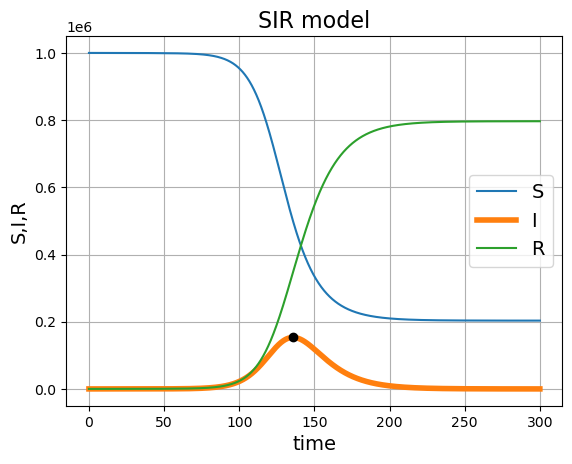

In [11]:
# --- Plot various things --- #
# get maximum I and the other corresponding values
max_I_index = I.argmax(axis=0)
max_I = I[max_I_index]
max_I_time = t[max_I_index]
max_I_S = S[max_I_index]

# plot the time evolution of the S, I, R and maximal I point
plt.plot(t, S, label = "S")
plt.plot(t, I, lw = 4, label = "I")
plt.plot(t, R, label = "R")
plt.plot(max_I_time,max_I,"ko")

# labels, legend etc
plt.xlabel("time", fontsize = 14)
plt.ylabel("S,I,R", fontsize = 14)
plt.title("SIR model", fontsize = 16)
plt.legend(fontsize = 14)
plt.grid()
plt.show()        


In [ ]:
# define a new function to get the maximum I for a given value of T

def get_max_I_vary_T(T,mu=0.1):
    # set up time grid for the solution
    tf = 300
    Nsteps = 10000
    t = np.linspace(0, tf, Nsteps+1)

    # Set initial conditions and put into array y0
    N = 10**6
    I0 = 5
    S0 = N - I0
    R0 = 0
    y0 = np.array([S0, I0, R0])
    out = (odeint(SIR,y0,t,args=(mu,T)))
    return max(out[:,1]) # The values of I are stored in out[:,1]

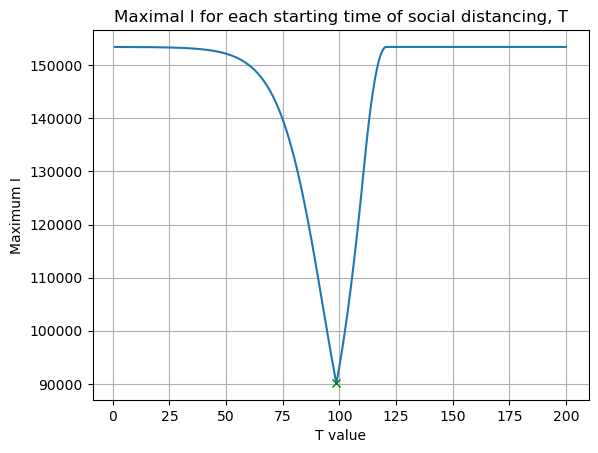

The minimum value of maximal infection occurs at T = 98.709


In [13]:
# Plot a graph of behaviour of the max I for different social distancing periods
Nsteps = 1000
T_values = np.linspace(1,200,Nsteps+1)
max_I_vals = np.zeros(Nsteps+1)
for i in range(0,len(T_values)):
    max_I_vals[i] = get_max_I_vary_T(T_values[i])

min_I_index = max_I_vals.argmin(axis=0)

plt.plot(T_values,max_I_vals)
plt.plot(T_values[min_I_index],max_I_vals[min_I_index],"gx")
plt.title("Maximal I for each starting time of social distancing, T")
plt.xlabel("T value")
plt.ylabel("Maximum I")
plt.grid()
plt.show()

# Print the part where the curve is flattened the most
print(f"The minimum value of maximal infection occurs at T = {T_values[min_I_index]}")

In [1]:
# N = S + I
import numpy as np
from matplotlib import pyplot

In [ ]:
def get_days_of_sim(beta,mu,N,I0):

    S = N - I0
    I = I0
    t = 0

    while I > 0:
        r1 = np.random.uniform(0, 1, 1)
        totalRate = beta*I*S + mu*I
        t = t - (1/totalRate)*np.log(r1)
        
        r2 = np.random.uniform(0, 1, 1)
        if r2 < beta*I*S/totalRate:
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            R = R + 1
    return t

In [ ]:


def prob_after_T_days(R0=0.8,I0=1,N=1000, mu=0.1,Nsteps=10000):
    S = N - I0
    beta = mu*R0/N

    T_vals = np.zeros(Nsteps)
    for i in range(0,T_vals):
        
